# **Lab 17: Training Neural Networks**
---

### **Description**
In today's lab you'll learn how to train a neural network and you'll experiment with different parameters for fine-tuning deep learning models.



<br>

### **Structure**
**Part 1**: [Review](#p1)

**Part 2**: [The Wine Dataset](#p2)

**Part 3**: [Hyperparameter Tuning](#p3)






<br>

### **Learning Objectives**
By the end of this lab, you will:
* Recognize how to train and evaluate a Neural Network.
* Recognize how to do hyperparameter tuning of learning rate, activation functions, and model architecture (layers and neurons).

<br>


### **Resources**:
* [Deep Learning with keras](https://docs.google.com/document/d/1WCV2ok7dwPWCid5vdOImknCAJS2te5aQ8yRp6J5Clac/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
from keras.models import Sequential
from keras.layers import *
!pip install --quiet keras_visualizer
from keras_visualizer import visualizer
from IPython.display import Image

from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<a name="p1"></a>

---
## **Part 1: Review**
---


#### **Problem #1.1**

Create and visualize a new model with three hidden layers.

* The input layer should have `10` neurons

* The first hidden layer should have `6` neurons with no activation.

* The second hidden layer should have `4` neurons with ReLU activation function.

* The third hidden layer should have `12` neurons with ReLU activation.

* The output layer should have `4` neurons.

###### **Solution**

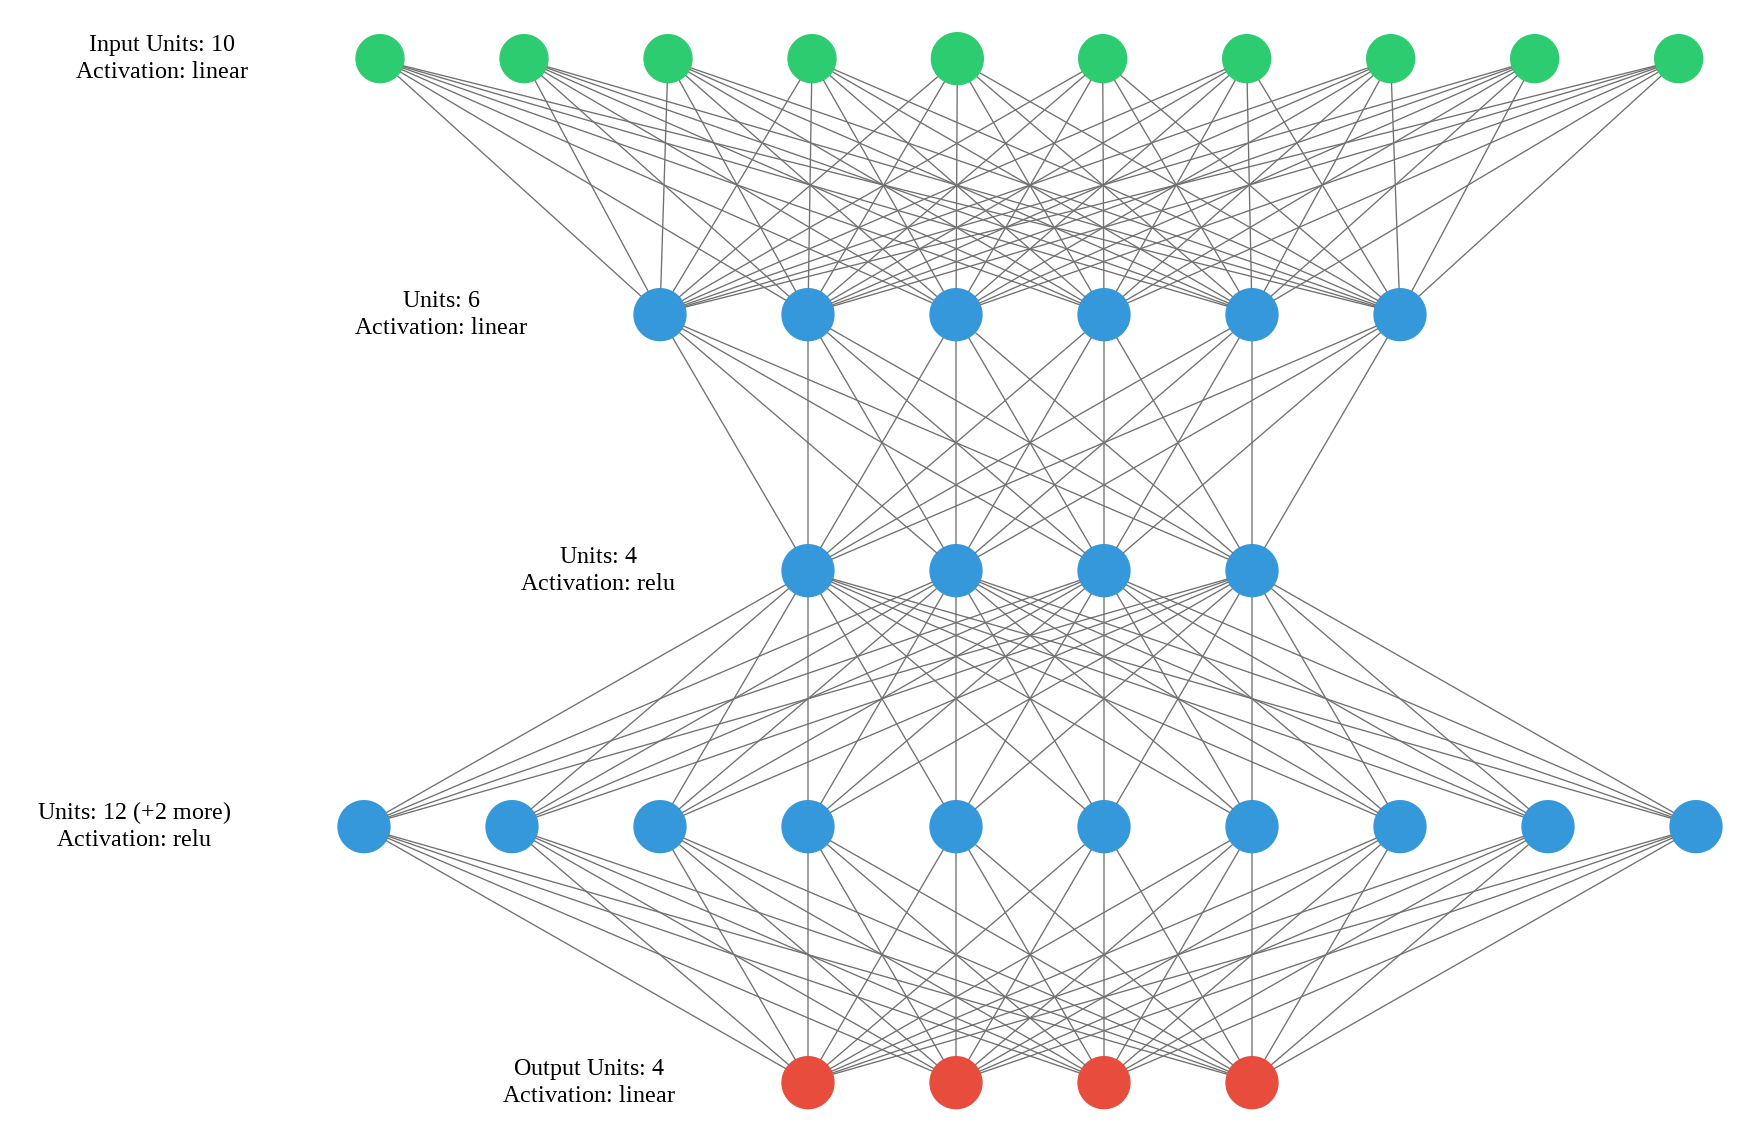

In [ ]:
model = Sequential()
model.add(Input(10))
model.add(Dense(6))
model.add(Dense(4, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4))

# Visualizing the network
visualizer(model, file_name="visual", file_format='png')
Image("visual.png")

#### **Problem #1.2**

Create and visualize a new model with three hidden layers.

* The input layer should have `8` neurons

* The first hidden layer should have `5` neurons with Sigmoid activation.

* The second hidden layer should have `8` neurons with ReLU activation function.

* The third hidden layer should have `7` neurons with no activation.

* The output layer should have `2` neurons.

###### **Solution**

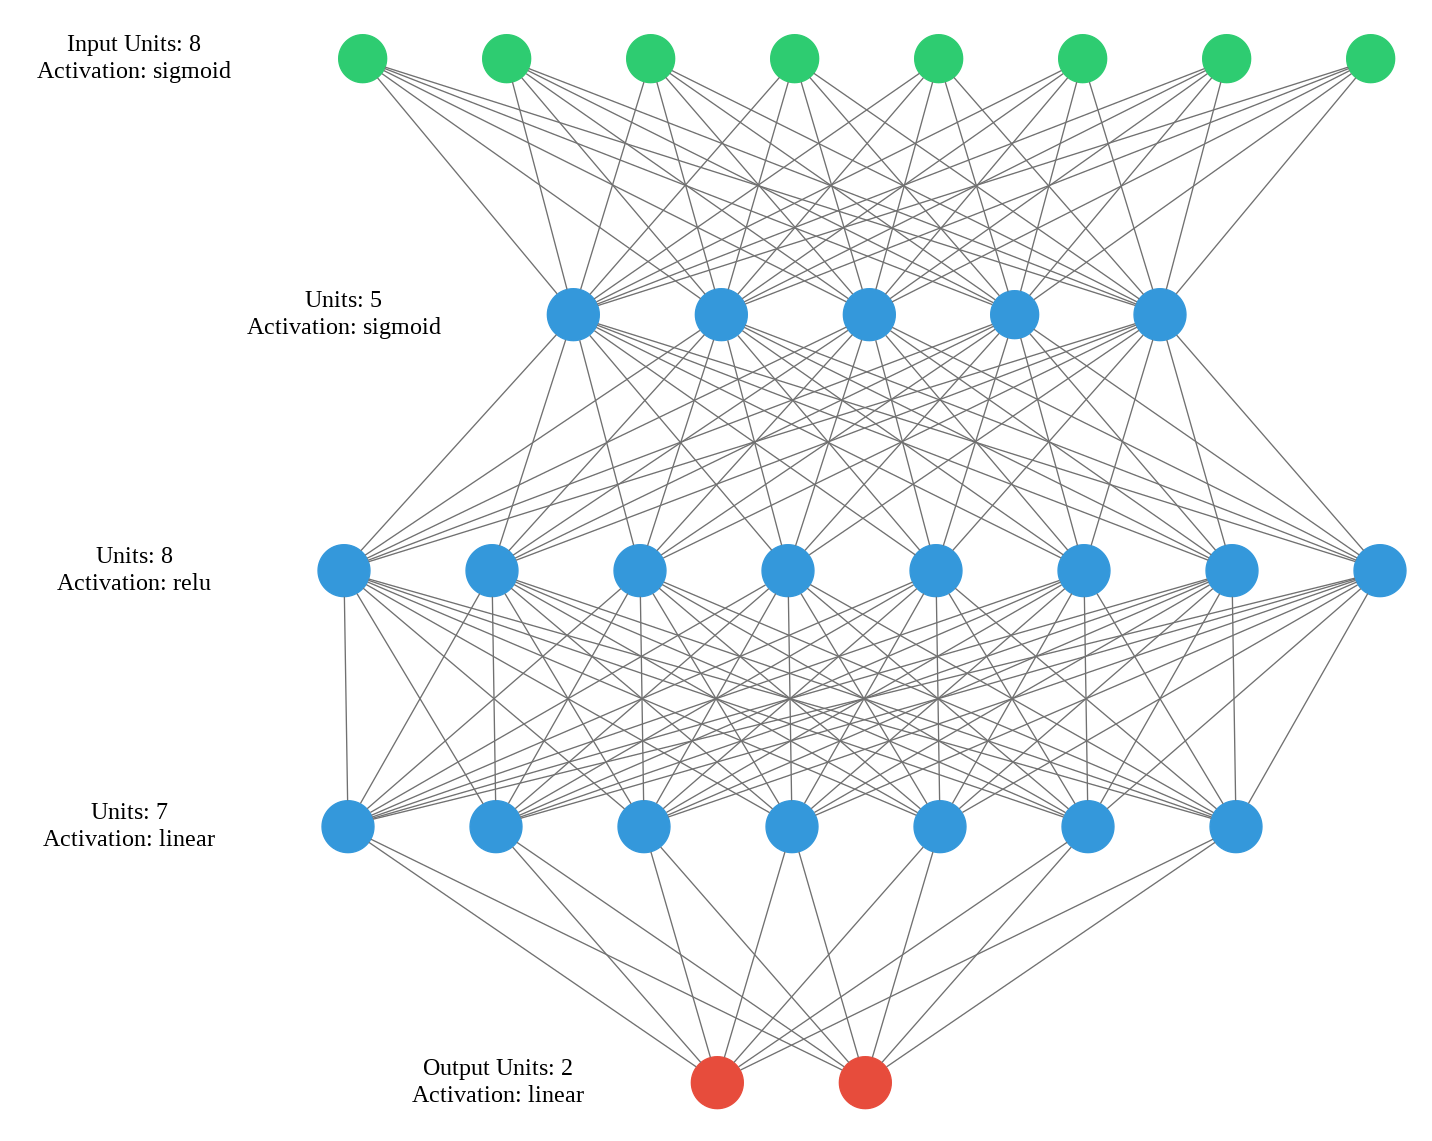

In [ ]:
model = Sequential()
model.add(Input(8))
model.add(Dense(5, activation = 'sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7))
model.add(Dense(2))

# Visualizing the network
visualizer(model, file_name="visual", file_format='png')
Image("visual.png")

---

<center>

#### **Wait for Your Instructor to Continue**

---


<a name="p2"></a>

---
## **Part 2: The Breast Cancer Dataset**
---

The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in machine learning for binary classification tasks. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset includes 569 instances, each with 30 numeric, real-valued features. These features describe characteristics of the cell nuclei present in the images, such as texture, radius, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

The target variable in this dataset is binary, indicating whether the breast mass is malignant or benign. This dataset is particularly significant in medical diagnostic research and machine learning due to its real-world implications in breast cancer diagnosis. It's an excellent resource for teaching machine learning techniques, especially in the context of binary classification problems.

**You will use deep learning for classification to predict this variable**:
12. `target` (binary value 0 or 1)



#### **Step #1: Import and and split the data into training/testing**


**This is completed for you. Just run the code below!**

In [ ]:
data = load_breast_cancer()
X = data['data']
y = data['target']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step #2: Determine the dimension of the data**



##### **Solution**

In [ ]:
X_train.shape

(455, 30)

#### **Step #3-6: Building the model**


Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* No hidden layers.
* Two output neurons with the `'linear'` activation function.

Don't forget to visualize the NN.

##### **Solution**

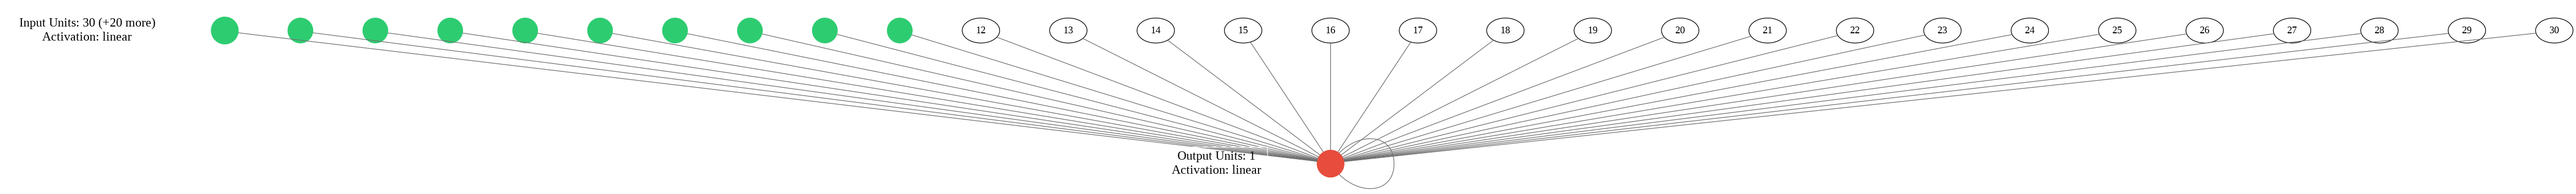

In [ ]:
model_nn = Sequential()
model_nn.add(Input(30))
model_nn.add(Dense(2, activation='linear'))

# Visualizing the network
visualizer(model_nn, file_name="visual", file_format='png')
Image("visual.png")

#### **Step #7: Fit the model**

Use the following parameters:

* `mse` loss function
* accuracy metric
* 10 epochs
* 0.1 learning rate

*Most of the code is given to you.*

In [ ]:
# Compile the model
opt = Adam(# COMPLETE THIS LINE
model_nn.compile(# COMPLETE THIS LINE

# Fit the model on the training data
history = model_nn.fit(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 12416.4541 - accuracy: 0.5582
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 4590.2275 - accuracy: 0.5055
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 2592.5935 - accuracy: 0.3692
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 1553.5432 - accuracy: 0.5824
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 692.0889 - accuracy: 0.5560
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 243.6884 - accuracy: 0.5429
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 221.4825 - accuracy: 0.5824
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 48.7777 - accuracy: 0.6000
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 25.3523 - accuracy: 0.4681
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 16.3411 - accuracy: 0.3516


#### **Step #8: Evaluate the model**



In [ ]:
print('MSE: ' + str(model_nn.evaluate(# COMPLETE THIS LINE


###### **Solution**

In [ ]:
print('MSE: ' + str(model_nn.evaluate(X_test, y_test)))


4/4 [==============================] - 0s 5ms/step - loss: 15.9287 - accuracy: 0.3333
MSE: [15.928655624389648, 0.3333333432674408]


<a name="p3"></a>

---
## **Part 3: Hyperparameter Tuning**
---

In this section, we will see how tuning hyperparameters can affect the performance of a Neural Network.

### **Problem #3.1**

Modify the code below to find the ideal `learning_rate` parameter given everything else is fixed. Consider values such as: `10`, `1`, `0.1`, `0.01`, `0.001`, and `0.0001`.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

##### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 10)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.001)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.001)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

### **Problem #3.2**

To reach the full potential of smaller learning rates, we often need to compensate by running more epochs. So, modify the code below to increase the `epochs` parameter to `100` and find the ideal `learning_rate` parameter given everything else is fixed. Consider values such as: `10`, `1`, `0.1`, `0.01`, `0.001`, and `0.0001`.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=10, batch_size = 64)

##### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 10)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 547435.6875 - mse: 547435.6875
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 78768.8594 - mse: 78768.8594
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 2783.9517 - mse: 2783.9517
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1954.5054 - mse: 1954.5054
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 405.2624 - mse: 405.2624
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 47.3443 - mse: 47.3443
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 40.0433 - mse: 40.0433
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 16.6157 - mse: 16.6157
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 7.5270 - mse: 7.5270
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 6.0219 - mse: 6.0219
Epoch 11/100
15/15 

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 3ms/step - loss: 105.5736 - mse: 105.5736
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 24.5744 - mse: 24.5744
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 5.7393 - mse: 5.7393
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 3.1788 - mse: 3.1788
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 1.3023 - mse: 1.3023
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 1.1313 - mse: 1.1313
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0683 - mse: 1.0683
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0623 - mse: 1.0623
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0683 - mse: 1.0683
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0633 - mse: 1.0633
Epoch 11/100
15/15 [==============================] -

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 7.1132 - mse: 7.1132
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 1.7618 - mse: 1.7618
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1.1676 - mse: 1.1676
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0479 - mse: 1.0479
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9144 - mse: 0.9144
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8448 - mse: 0.8448
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7614 - mse: 0.7614
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6932 - mse: 0.6932
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6850 - mse: 0.6850
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6542 - mse: 0.6542
Epoch 11/100
15/15 [==============================] - 0s 2m

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 22.4128 - mse: 22.4128
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 15.0454 - mse: 15.0454
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 10.3086 - mse: 10.3086
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 6.3308 - mse: 6.3308
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 3.7291 - mse: 3.7291
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 2.4165 - mse: 2.4165
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1.8416 - mse: 1.8416
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1.6119 - mse: 1.6119
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 1.4659 - mse: 1.4659
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1.3597 - mse: 1.3597
Epoch 11/100
15/15 [==============================] -

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.001)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 22.4867 - mse: 22.4867
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 21.1339 - mse: 21.1339
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 19.8902 - mse: 19.8902
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 18.7260 - mse: 18.7260
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 17.6278 - mse: 17.6278
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 16.6145 - mse: 16.6145
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 15.6402 - mse: 15.6402
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 14.7360 - mse: 14.7360
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 13.8680 - mse: 13.8680
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 13.0591 - mse: 13.0591
Epoch 11/100
15/15 [===================

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.001)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 13.1731 - mse: 13.1731
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 12.3036 - mse: 12.3036
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 11.4463 - mse: 11.4463
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 10.6048 - mse: 10.6048
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 9.7860 - mse: 9.7860
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 8.9993 - mse: 8.9993
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 8.2290 - mse: 8.2290
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 7.5140 - mse: 7.5140
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 6.8442 - mse: 6.8442
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 6.2117 - mse: 6.2117
Epoch 11/100
15/15 [==============================]

### **Problem #3.3**

The last main hyperparameter for us to consider is `batch_size`, which is how many data points we use to make a single update to the weights and parameters. Modify the code below to find the ideal `batch_size` given everything else is fixed. Consider values such as: `1`, `32`, `64`, `256`, and `len(X_train)`.

<br>

**NOTE**: Each epoch involves looking at *all* of the data points. In other words, **size of training data = batch_size * number of updates per epoch**. So, increasing `batch_size`, decreases the number of updates, which in turn speeds up each epoch. As such, pay attention to the amount of time it takes to run through each epoch.

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 1s 3ms/step - loss: 28.7285 - mse: 28.7285
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 10.3493 - mse: 10.3493
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 6.4206 - mse: 6.4206
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 4.7439 - mse: 4.7439
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 3.4833 - mse: 3.4833
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 2.5702 - mse: 2.5702
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 2.0598 - mse: 2.0598
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1.9041 - mse: 1.9041
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1.7148 - mse: 1.7148
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1.6398 - mse: 1.6398
Epoch 11/100
15/15 [==============================] - 0

##### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 1)

Epoch 1/100
914/914 [==============================] - 1s 938us/step - loss: 1.9513 - mse: 1.9513
Epoch 2/100
914/914 [==============================] - 1s 913us/step - loss: 1.1875 - mse: 1.1875
Epoch 3/100
914/914 [==============================] - 1s 908us/step - loss: 0.9550 - mse: 0.9550
Epoch 4/100
914/914 [==============================] - 1s 906us/step - loss: 0.8170 - mse: 0.8170
Epoch 5/100
914/914 [==============================] - 1s 915us/step - loss: 0.7579 - mse: 0.7579
Epoch 6/100
914/914 [==============================] - 1s 1ms/step - loss: 0.7202 - mse: 0.7202
Epoch 7/100
914/914 [==============================] - 1s 1ms/step - loss: 0.6682 - mse: 0.6682
Epoch 8/100
914/914 [==============================] - 1s 1ms/step - loss: 0.6745 - mse: 0.6745
Epoch 9/100
914/914 [==============================] - 2s 2ms/step - loss: 0.6579 - mse: 0.6579
Epoch 10/100
914/914 [==============================] - 2s 2ms/step - loss: 0.6918 - mse: 0.6918
Epoch 11/100
914/914 [=======

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 16)

Epoch 1/100
58/58 [==============================] - 0s 873us/step - loss: 10.0040 - mse: 10.0040
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 2.3371 - mse: 2.3371
Epoch 3/100
58/58 [==============================] - 0s 897us/step - loss: 1.5141 - mse: 1.5141
Epoch 4/100
58/58 [==============================] - 0s 1ms/step - loss: 1.1751 - mse: 1.1751
Epoch 5/100
58/58 [==============================] - 0s 1ms/step - loss: 1.0580 - mse: 1.0580
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 1.0041 - mse: 1.0041
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.9099 - mse: 0.9099
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 0.8878 - mse: 0.8878
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 0.8276 - mse: 0.8276
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 0.8285 - mse: 0.8285
Epoch 11/100
58/58 [==============================] -

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 0s 1ms/step - loss: 10.8942 - mse: 10.8942
Epoch 2/100
29/29 [==============================] - 0s 979us/step - loss: 2.9820 - mse: 2.9820
Epoch 3/100
29/29 [==============================] - 0s 988us/step - loss: 1.8875 - mse: 1.8875
Epoch 4/100
29/29 [==============================] - 0s 945us/step - loss: 1.5527 - mse: 1.5527
Epoch 5/100
29/29 [==============================] - 0s 968us/step - loss: 1.3447 - mse: 1.3447
Epoch 6/100
29/29 [==============================] - 0s 999us/step - loss: 1.2262 - mse: 1.2262
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 1.1281 - mse: 1.1281
Epoch 8/100
29/29 [==============================] - 0s 998us/step - loss: 1.0633 - mse: 1.0633
Epoch 9/100
29/29 [==============================] - 0s 975us/step - loss: 1.0176 - mse: 1.0176
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.9524 - mse: 0.9524
Epoch 11/100
29/29 [=======================

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 64)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 21.2800 - mse: 21.2800
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 14.5957 - mse: 14.5957
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 11.0754 - mse: 11.0754
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 8.7319 - mse: 8.7319
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 6.7228 - mse: 6.7228
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 4.9603 - mse: 4.9603
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 3.6840 - mse: 3.6840
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 2.7711 - mse: 2.7711
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 2.2559 - mse: 2.2559
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1.9098 - mse: 1.9098
Epoch 11/100
15/15 [==============================] -

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = 256)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 19.5775 - mse: 19.5775
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 16.7009 - mse: 16.7009
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 14.2286 - mse: 14.2286
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 12.1899 - mse: 12.1899
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 10.4634 - mse: 10.4634
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 9.0090 - mse: 9.0090
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 7.7788 - mse: 7.7788
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 6.7506 - mse: 6.7506
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 5.8941 - mse: 5.8941
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 5.2071 - mse: 5.2071
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - los

In [ ]:
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, epochs=100, batch_size = len(X_train))

Epoch 1/100
1/1 [==============================] - 0s 220ms/step - loss: 27.8552 - mse: 27.8552
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 26.7355 - mse: 26.7355
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 25.6740 - mse: 25.6740
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 24.6673 - mse: 24.6673
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 23.7149 - mse: 23.7149
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 22.8159 - mse: 22.8159
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 21.9658 - mse: 21.9658
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 21.1628 - mse: 21.1628
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 20.4049 - mse: 20.4049
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 19.6908 - mse: 19.6908
Epoch 11/100
1/1 [==============================] - 0s 

### **Problem #3.4**

With so many hyperparameters to tune and potentially deep & complex NNs, the amount of information printed out often becomes less helpful to dig through. It is common practice to visualize the performance of different models for each epoch instead. Furthermore, we can "mute" the output of the `fit(...)` function by setting `verbose = False`.

<br>

**Complete the code below to train and visualize the losses of a NN with the best set of hyperparameters you found above.**


Some questions to consider:
* Does the loss tend to increase or decrease?
* Should we have let the model train for more epochs?
* Could we have gotten away with fewer epochs?


In [ ]:
# BUILD AND TRAIN
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = # COMPLETE THIS LINE
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = False, # COMPLETE THIS LINE


# VISUALIZE
loss = history.history['loss']
plt.plot(loss)

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.show()

#### **Solution**

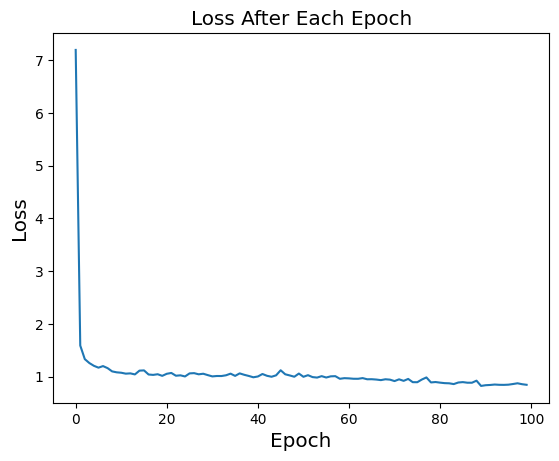

In [ ]:
# BUILD AND TRAIN
model_nn = Sequential()
model_nn.add(Input(11))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model_nn.compile(optimizer = opt, loss = 'mse', metrics = ['mse'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = False, epochs=100, batch_size = 32)


# VISUALIZE
loss = history.history['loss']
plt.plot(loss)

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.show()

---
##© 2024 The Coding School, All rights reserved